In [83]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
hotel_data = pd.read_csv('hotel_bookings.csv')

In [85]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_data.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [87]:
import copy
data_new = copy.deepcopy(hotel_data)
data_new.drop("company", axis=1, inplace=True)
data_new["children"].fillna(data_new["children"].median(), inplace=True)
data_new["country"].fillna(data_new["country"].mode()[0],inplace=True)
data_new["agent"].fillna(0, inplace=True)
data_new.isnull().sum()
# 统一类型
data_new["children"] = data_new["children"].astype(int)
data_new["agent"] = data_new["agent"].astype(int)

# 初始条件，餐饮字段中的Undefined / SC –无餐套餐为一类
data_new["meal"].replace("Undefined", "SC", inplace=True)

# 去掉异常值
zero_guests = list(data_new["adults"] + data_new["children"] + data_new["babies"] == 0)
data_new.drop(data_new.index[zero_guests],inplace=True)


In [22]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int32  
 11  babies                          119210 non-null  int64  
 12  meal            

<AxesSubplot:xlabel='hotel', ylabel='count'>

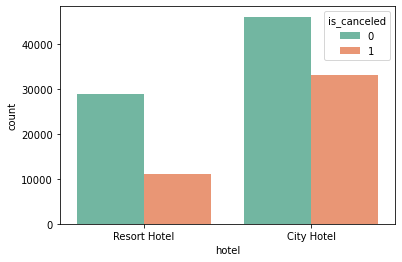

In [23]:
import seaborn as sns
sns.countplot(x='hotel',hue='is_canceled',data=data_new,palette='Set2')

<AxesSubplot:xlabel='hotel', ylabel='count'>

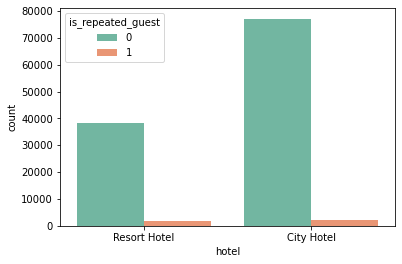

In [24]:
sns.countplot(x='hotel',hue='is_repeated_guest',data=data_new,palette='Set2')

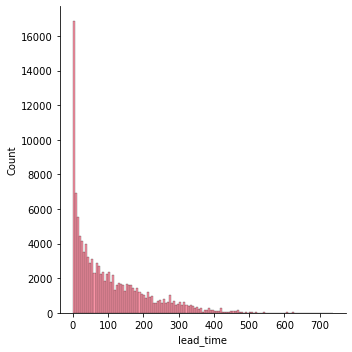

In [25]:
sns.displot(x='lead_time',data=data_new,palette='Set2')

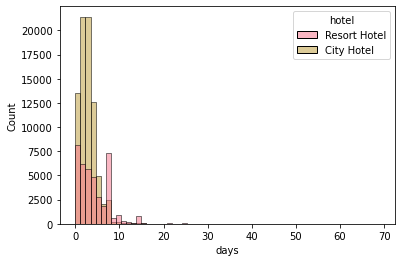

In [26]:
data_new['days']=data_new['stays_in_weekend_nights']+data_new['stays_in_week_nights']
sns.histplot(x='days',hue='hotel',data=data_new,bins=60)
sns.set_palette('husl')

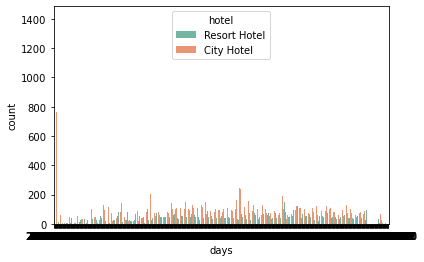

In [27]:
data_new['days']=data_new['reservation_status_date']
sns.countplot(x='days',hue='hotel',data=data_new,palette='Set2')
sns.set_palette('husl')

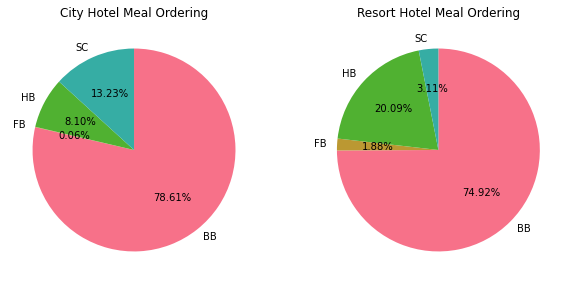

In [28]:
data_new ['meal'].replace('Undefined',' sc', inplace=True)
ch=data_new[data_new ['hotel']=='City Hotel']
rh=data_new[data_new ['hotel']=='Resort Hotel']
data1= ch.groupby('meal').count()['agent']
data2= rh.groupby('meal').count()['agent']
plt.figure(figsize= [10,5])
plt.subplot(1, 2,1) 
plt.pie(data1, labels=data1.index, counterclock=False, autopct='%.2f%%', startangle=90) 
plt.title('City Hotel Meal Ordering')
plt.subplot(1, 2, 2)
plt.pie (data2, labels=data2.index, counterclock=False, autopct='%.2f%%', startangle=90) 
plt.title('Resort Hotel Meal Ordering')
plt.show()

Text(0, 0.5, 'avg price per person/bight')

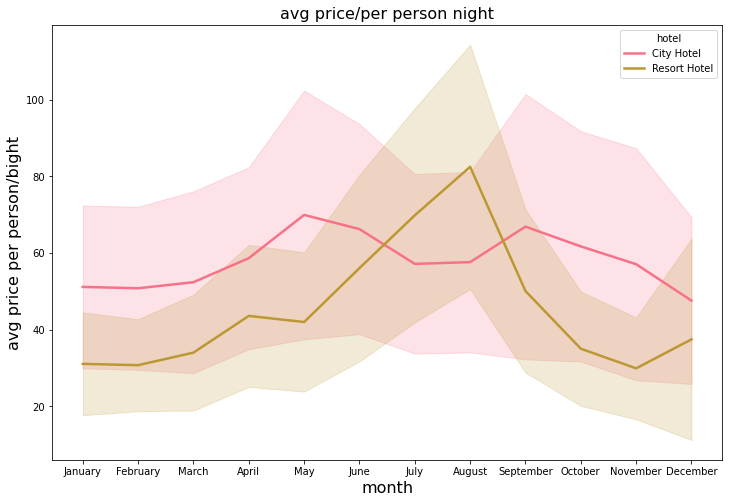

In [33]:
data_new["adr_pp"] = data_new["adr"] / (data_new["adults"] + data_new["children"]+ data_new["babies"])
full_data_guests = data_new.loc[data_new["is_canceled"] == 0] # only actual gusts
room_price_monthly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
month_che = ["January", "February", "March", "April", "May", "June", "July", "August",
                 "September", "October", "November", "December"]
room_price_monthly["arrival_date_month"] = pd.Categorical(room_price_monthly["arrival_date_month"],
                                                         categories=month_che, ordered=True)
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_price_monthly, hue_order=["City Hotel", "Resort Hotel"], 
             ci="sd", size="hotel", sizes=(2.5, 2.5))
sns.set_palette('coolwarm')
plt.title("avg price/per person night", fontsize=16)
plt.xlabel("month", fontsize=16)
plt.ylabel("avg price per person/bight", fontsize=16)


Text(0, 0.5, 'visitor number')

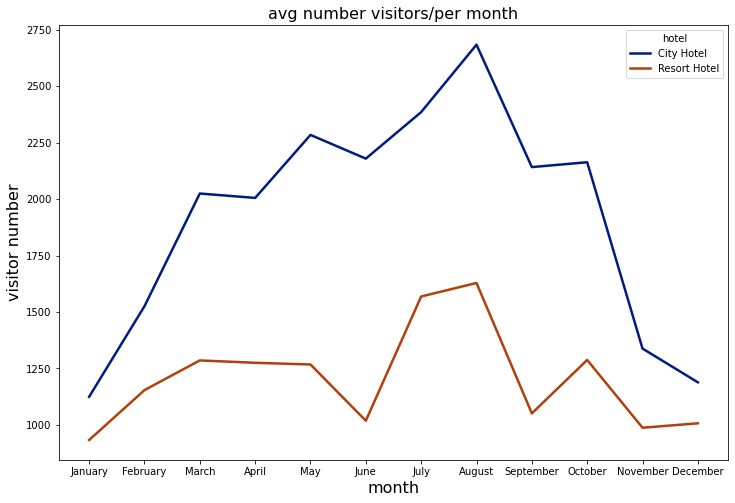

In [44]:
# 查看月度人流量
rh_bookings_monthly = full_data_guests[full_data_guests.hotel=="Resort Hotel"].groupby("arrival_date_month")["hotel"].count()
ch_bookings_monthly = full_data_guests[full_data_guests.hotel=="City Hotel"].groupby("arrival_date_month")["hotel"].count()

rh_bookings_data = pd.DataFrame({"arrival_date_month": list(rh_bookings_monthly.index),
                                "hotel": "Resort Hotel",
                                "guests": list(rh_bookings_monthly.values)})
ch_bookings_data = pd.DataFrame({"arrival_date_month": list(ch_bookings_monthly.index),
                                "hotel": "City Hotel",
                                "guests": list(ch_bookings_monthly.values)})
full_booking_monthly_data = pd.concat([rh_bookings_data, ch_bookings_data], ignore_index=True)

month_che = ["January", "February", "March", "April", "May", "June", "July", "August",
                 "September", "October", "November", "December"]

full_booking_monthly_data["arrival_date_month"] = pd.Categorical(full_booking_monthly_data["arrival_date_month"],
                                                      categories=month_che, ordered=True)

full_booking_monthly_data.loc[(full_booking_monthly_data["arrival_date_month"]=="七月")|(full_booking_monthly_data["arrival_date_month"]=="八月"), "guests"] /= 3
full_booking_monthly_data.loc[~((full_booking_monthly_data["arrival_date_month"]=="七月")|(full_booking_monthly_data["arrival_date_month"]=="八月")), "guests"] /= 2
plt.figure(figsize=(12, 8))
sns.set_palette(sns.color_palette('dark'))
sns.lineplot(x="arrival_date_month",
            y="guests",
            hue="hotel", hue_order=["City Hotel", "Resort Hotel"],
            data=full_booking_monthly_data, size="hotel", sizes=(2.5, 2.5))

plt.title("avg number visitors/per month", fontsize=16)
plt.xlabel("month", fontsize=16)
plt.ylabel("visitor number", fontsize=16)

In [86]:
cancel_corr = data_new.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
adr_pp                            0.019529
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [89]:
num_features = ["lead_time","total_of_special_requests","required_car_parking_spaces", 
                 "previous_cancellations","is_repeated_guest","adults","previous_bookings_not_canceled","agent",
                "adr","babies","stays_in_weekend_nights","arrival_date_week_number","arrival_date_day_of_month",
                "children","stays_in_week_nights"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]
#分离特征和预测值
features = num_features + cat_features
X = data_new.drop(["is_canceled"], axis=1)[features]
y = data_new["is_canceled"]

In [92]:
num_transformer = SimpleImputer(strategy="constant")
cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
                                  ("onehot", OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])
base_models = LogisticRegression(random_state=42,n_jobs=-1,solver='liblinear')
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
cv_results = cross_val_score(model_steps, X, y, cv=split,scoring="accuracy",n_jobs=-1)
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print("LR_model cross validation accuarcy score:"+str(mean_score))

LR_model cross validation accuarcy score:0.808
